## Project 3 - Luxury Handbag Auction Sales 
### Interactive Visualization for Christie's March 6 2025 Handbag Auction Sale March 31 2025

In [287]:
# Uploading Libraries

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import altair as alt

## PART 1 : Importing, reading, cleaning, adjusting and saving the CSV file.

In [288]:
# Import and read csv file 
df = pd.read_csv("../Project3-Luxurybags/Christies Hong Kong March 2025 Cleaned .csv")
# Display Dataframe
df


,Lot,Description,Brand,Type (All Lots),Year,Color,Leather,Hardware,Estimate (USD),Price Realized (USD)
0,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,"5,100−7,700",6100
1,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",9700
2,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",12100
3,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,"2,600−3,800",2300
4,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,"5,100−7,700",5600
...,...,...,...,...,...,...,...,...,...,...
237,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,"2,600−3,600",4800
238,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,"3,800−5,100",3500
239,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,"2,600−3,600",4200
240,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,"3,800−5,100",4800


In [289]:
# Extract Info on Data frame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Lot                   242 non-null    int64 
 1   Description           242 non-null    object
 2   Brand                 242 non-null    object
 3   Type (All Lots)       242 non-null    object
 4   Year                  242 non-null    int64 
 5   Color                 242 non-null    object
 6   Leather               242 non-null    object
 7   Hardware              242 non-null    object
 8   Estimate (USD)        242 non-null    object
 9   Price Realized (USD)  242 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 19.0+ KB
None


In [290]:
# Rename Type (All Lots) to Type
df.rename(columns={'Type (All Lots)': 'Type'}, inplace=True)
# Display Dataframe
df


,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Price Realized (USD)
0,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,"5,100−7,700",6100
1,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",9700
2,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",12100
3,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,"2,600−3,800",2300
4,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,"5,100−7,700",5600
...,...,...,...,...,...,...,...,...,...,...
237,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,"2,600−3,600",4800
238,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,"3,800−5,100",3500
239,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,"2,600−3,600",4200
240,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,"3,800−5,100",4800


In [291]:
# Reset the Index making sure it starts at 1 instead of 0
df = df.reset_index(drop=True)  # Reset index and drop the old one
df.index = df.index + 1  # Start at 1
# Display Dataframe
df

,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Price Realized (USD)
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,"5,100−7,700",6100
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",9700
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",12100
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,"2,600−3,800",2300
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,"5,100−7,700",5600
...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,"2,600−3,600",4800
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,"3,800−5,100",3500
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,"2,600−3,600",4200
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,"3,800−5,100",4800


In [292]:
# Split 'Estimate (USD)' into 'Lower Estimate' & 'Higher Estimate'
# Ensure consistent separator and remove commas
df["Estimate (USD)"] = df["Estimate (USD)"].str.replace(",", "", regex=True)
df[["Lower Estimate (USD)", "Higher Estimate (USD)"]] = df["Estimate (USD)"].str.split("−", expand=True)

# Convert to numeric instead of object
df["Lower Estimate (USD)"] = pd.to_numeric(df["Lower Estimate (USD)"])
df["Higher Estimate (USD)"] = pd.to_numeric(df["Higher Estimate (USD)"])

# Show results
df

,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Price Realized (USD),Lower Estimate (USD),Higher Estimate (USD)
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,5100−7700,6100,5100,7700
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,9700,7700,12800
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,12100,7700,12800
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,2600−3800,2300,2600,3800
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,5100−7700,5600,5100,7700
...,...,...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,2600−3600,4800,2600,3600
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,3800−5100,3500,3800,5100
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,2600−3600,4200,2600,3600
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,3800−5100,4800,3800,5100


In [293]:
# print new data info after adjustments were made 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 1 to 242
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Lot                    242 non-null    int64 
 1   Description            242 non-null    object
 2   Brand                  242 non-null    object
 3   Type                   242 non-null    object
 4   Year                   242 non-null    int64 
 5   Color                  242 non-null    object
 6   Leather                242 non-null    object
 7   Hardware               242 non-null    object
 8   Estimate (USD)         242 non-null    object
 9   Price Realized (USD)   242 non-null    int64 
 10  Lower Estimate (USD)   242 non-null    int64 
 11  Higher Estimate (USD)  242 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 22.8+ KB
None


In [294]:
# Reordering columns to place the price realized column at the end
columns_order = [
    "Lot", "Description", "Brand", "Type", "Year", "Color", "Leather", "Hardware",
    "Estimate (USD)", "Lower Estimate (USD)", "Higher Estimate (USD)", "Price Realized (USD)"
]

# Apply the new column order
df = df[columns_order]

# display to verify
df


,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Lower Estimate (USD),Higher Estimate (USD),Price Realized (USD)
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,5100−7700,5100,7700,6100
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,9700
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,12100
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,2600−3800,2600,3800,2300
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,5100−7700,5100,7700,5600
...,...,...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,2600−3600,2600,3600,4800
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,3800−5100,3800,5100,3500
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,2600−3600,2600,3600,4200
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,3800−5100,3800,5100,4800


In [295]:
# Add a new column categorizing price based on how sale results compare to estimates
def categorize_price(row):
    if pd.isna(row['Price Realized (USD)']) or row['Price Realized (USD)'] == 0:
        return 'No Sale' #If Price Realized is zero or nit mentioned display "No Sale"
    elif row['Price Realized (USD)'] < row['Lower Estimate (USD)']:
        return 'Below Estimate' #If Price Realized is under the lower estimate display "Below Estimate"
    elif row['Price Realized (USD)'] > row['Higher Estimate (USD)']:
        return 'Above Estimate' #If Price Realized is above the lower estimate display "Above Estimate"
    else:
        return 'Within Estimate' #If Price Realized is within the estimates display "Within Estimate"

df['Price Category'] = df.apply(categorize_price, axis=1)
# display dataframe
df


/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_82090/708171887.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Lower Estimate (USD),Higher Estimate (USD),Price Realized (USD),Price Category
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,5100−7700,5100,7700,6100,Within Estimate
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,9700,Within Estimate
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,12100,Within Estimate
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,2600−3800,2600,3800,2300,Below Estimate
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,5100−7700,5100,7700,5600,Within Estimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,2600−3600,2600,3600,4800,Above Estimate
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,3800−5100,3800,5100,3500,Below Estimate
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,2600−3600,2600,3600,4200,Above Estimate
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,3800−5100,3800,5100,4800,Within Estimate


In [296]:
# Add 'Variance from Estimate' column measuring price realized compared to the higher estimate
df['Variance from Higher Estimate'] = df['Price Realized (USD)'] - df['Higher Estimate (USD)']
#display dataframe
df

/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_82090/403065320.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Lower Estimate (USD),Higher Estimate (USD),Price Realized (USD),Price Category,Variance from Higher Estimate
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,5100−7700,5100,7700,6100,Within Estimate,-1600
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,9700,Within Estimate,-3100
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,12100,Within Estimate,-700
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,2600−3800,2600,3800,2300,Below Estimate,-1500
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,5100−7700,5100,7700,5600,Within Estimate,-2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,2600−3600,2600,3600,4800,Above Estimate,1200
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,3800−5100,3800,5100,3500,Below Estimate,-1600
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,2600−3600,2600,3600,4200,Above Estimate,600
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,3800−5100,3800,5100,4800,Within Estimate,-300


In [297]:
#remove the french acent from the word Hermes in the brand column
df['Brand'] = df['Brand'].str.upper().str.strip().replace({'HERMÈS': 'HERMES'})
#display dataframe
df

/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_82090/401750262.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Lower Estimate (USD),Higher Estimate (USD),Price Realized (USD),Price Category,Variance from Higher Estimate
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMES,Mini Roulis,2022,Green,Evercolor,Palladium,5100−7700,5100,7700,6100,Within Estimate,-1600
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMES,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,9700,Within Estimate,-3100
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMES,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,12100,Within Estimate,-700
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMES,Constance Wallet,2011,Yellow,Lizard,Palladium,2600−3800,2600,3800,2300,Below Estimate,-1500
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMES,Constance To Go,2023,Yellow,Epsom,Gold,5100−7700,5100,7700,5600,Within Estimate,-2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,2600−3600,2600,3600,4800,Above Estimate,1200
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,3800−5100,3800,5100,3500,Below Estimate,-1600
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,2600−3600,2600,3600,4200,Above Estimate,600
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,3800−5100,3800,5100,4800,Within Estimate,-300


In [298]:
#Save the new dataframe in the repository
df.to_csv("../Project3-Luxurybags/Cleaned_Enhanced_Luxury_Bag_Data.csv", index=False)


## PART 2 : Creating the Sqlite database: luxury_hadbag_auctions.db
### Adding the ChristiesHK_Mar25 dataframe to the database. 

In [299]:
import sqlite3

#Connect or create SQLite database
conn=sqlite3.connect("luxury_handbag_auctions.db")

#Save Dataframe as a table
df.to_sql("ChristiesHK_Mar25",conn, if_exists="replace", index=False)

#test:show first few rows
print(pd.read_sql("SELECT * FROM ChristiesHK_Mar25 LIMIT 5", conn))

   Lot                                        Description   Brand  \
0    1  LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...  HERMES   
1    2  LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...  HERMES   
2    3  LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...  HERMES   
3    4  SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...  HERMES   
4    5        NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO  HERMES   

                         Type  Year   Color    Leather   Hardware  \
0                 Mini Roulis  2022   Green  Evercolor  Palladium   
1   Kelly 32, Limited Edition  2011  Yellow      Epsom  Palladium   
2  Birkin 35, Limited Edition  2011  Yellow      Epsom  Palladium   
3            Constance Wallet  2011  Yellow     Lizard  Palladium   
4             Constance To Go  2023  Yellow      Epsom       Gold   

  Estimate (USD)  Lower Estimate (USD)  Higher Estimate (USD)  \
0      5100−7700                  5100                   7700   
1     7700−12800                  7700  

## PART 3 : VISUALIZATIONS

### Visualizations 1 : General Sale Performance
a - Sale Total\
b - Auction Performance: Lot Sales Relative to Estimates

#### a- Sale Total

In [349]:
# a- SALE TOTAL

#Calculate total price realized 

# Query the sum directly from the database (faster for large datasets)
total_sum = pd.read_sql(
    "SELECT SUM([Price Realized (USD)]) as Total_Sum FROM ChristiesHK_Mar25", 
    conn
)["Total_Sum"][0]  # Extract the sum value

print(f"Total Price Realized (USD): ${total_sum:,.2f}")  # Format with commas

Total Price Realized (USD): $3,557,200.00


### b - Auction Performance: LOT SALES RELATIVE TO ESTIMATES

In [350]:
# b- Auction Performance Price realized relative to Estimate Bar Chart

# CCREATE TABLE 
# Query to get Price Category counts (same logic as the plot)
query = """
    SELECT 
        `Price Category`, 
        COUNT(*) AS "Number of Bags" 
    FROM ChristiesHK_Mar25
    GROUP BY `Price Category`
    ORDER BY `Price Category`
"""
price_category_table = pd.read_sql(query, conn)

#SAVE THE TABLE IN THE DATABASE
price_category_table.to_sql(
    "Price_Category_Estimates",  # Table name
    conn,
    if_exists="replace",     # Overwrite if table exists
    index=False              # Don't save the index as a column
)

# Display the table
print("Price Category Estimates Table:")
price_category_table


Price Category Estimates Table:


,Price Category,Number of Bags
0,Above Estimate,106
1,Below Estimate,21
2,No Sale,12
3,Within Estimate,103


/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_82090/338937561.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




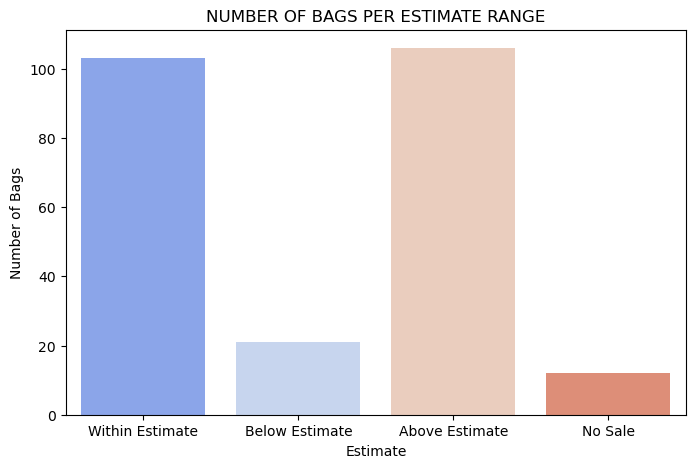

In [ ]:
# PLOT SALES RELATIVE TO ESTIMATES bar chart
# Plot the bar chart
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Price Category', palette='coolwarm')

plt.title("LOT SALES RELATIVE TO ESTIMATES")
plt.ylabel("Number of Bags")
plt.xlabel("Estimate")
plt.show()

/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_82090/884079474.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




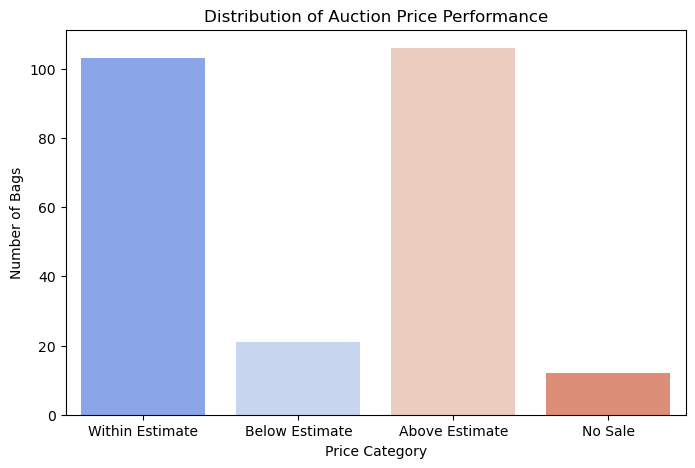

In [352]:
# PLOT THE BAR CHART
# Using Plotly to plot the bar chart 
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Price Category', palette='coolwarm')

plt.title("Distribution of Auction Price Performance")
plt.ylabel("Number of Bags")
plt.xlabel("Price Category")
plt.show()

### Visualizations 2 : General Sale Results by BRAND 
a - PLOTLY Barchart 1: TOTAL SALES BY BRAND : DF : brand_sale_total \
b - ALTAIR Barchart 2: AVERAGE SALES BY BRAND : DF : Brand_Average_Prices

#### a- Plotly library to visualize the TOTAL SALES BY BRAND

In [353]:
# a- Using Plotly to viualize the TOTAL SALES BY BRAND

# CREATING TABLE
# Read data from the database table
df = pd.read_sql("SELECT * FROM ChristiesHK_Mar25", conn)
# Calculate sum of sales per brand
brand_sale_total = df.groupby("Brand")["Price Realized (USD)"].sum().reset_index()


# SAVING TABLE
# Save the brand_sale_total dataframe to the database
brand_sale_total.to_sql("Brand_Sale_Total", conn, if_exists="replace", index=False)

3

In [354]:
# PLOTTING the TOTAL SALES BY BRAND CHART
# Create an interactive bar chart
fig = px.bar(
    brand_sale_total, 
    x="Brand", 
    y="Price Realized (USD)", 
    text="Price Realized (USD)", 
    title="TOTAL SALES BY BRAND",
    labels={"Price Realized (USD)": "Total Sales (USD)"},
    color="Brand",
)
# Customize layout
fig.update_traces(
    texttemplate='$%{text:,.2f}',  # Format as currency with commas
    textposition='outside'
)
fig.update_layout(
    xaxis_tickangle=0, 
    yaxis_title="Total Sales (USD)", 
    xaxis_title="Brand",
    yaxis_range=[0, 4000000],  # Set y-axis range from 0 to 4 million
    # Optional: Format y-axis ticks as dollar amounts
    yaxis_tickprefix="$",
    yaxis_tickformat=",",  # Adds comma separators
)

# Show the interactive chart
fig.show()

#### b- Altair library to visualize the AVERAGE PRICE BY BRAND

In [355]:
#c- Using Altair to viualize the AVERAGE PRICE BY BRAND


# CREATE A DATAFRAME FOR AVERAGE PRICE PER BRAND 
# 1. Calculate average prices directly in SQL
query = """
SELECT 
    Brand,
    AVG(CAST(`Price Realized (USD)` AS REAL)) as `Average_Price_USD`
FROM 
    ChristiesHK_Mar25
WHERE
    `Price Realized (USD)` != ''  -- Exclude empty values
GROUP BY 
    Brand
ORDER BY
    `Average_Price_USD` DESC
"""
# 2. Execute query and load results
brand_avg = pd.read_sql(query, conn)


# SAVE TABLE INTO DATABASE 
# 3. Save the aggregated data back to the database as a new table
brand_avg.to_sql(
    "Brand_Average_Prices", 
    conn, 
    if_exists="replace", 
    index=False
)
print("Average price per brand")
brand_avg


# CREATE VISUALIZATION
# 4 Create visualization
chart = alt.Chart(brand_avg).mark_bar().encode(
    x=alt.X('Brand:N', sort='-y', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('Average_Price_USD:Q', title='Average Price (USD)'),
    tooltip=['Brand', 'Average_Price_USD']
).properties(
    title='Average Price Per Brand Item',
    width=600,
    height=400
)
# Display results
chart.display()

Average price per brand


/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)

In [356]:
### Visualizations 3
# 
# 
#  : General Sale Results by BRAND 
a - Sale Total\
b - PLOTLY Barchart 1: TOTAL SALES BY BRAND : DF : brand_sale_total \
c - ALTAIR Barchart 2: AVERAGE SALES BY BRAND : DF : Brand_Average_Prices

SyntaxError: invalid syntax (710101739.py, line 5)

In [ ]:
# # Query: Top 3 Hermès sales 
# query = """
# SELECT Brand, Description, `Price Realized (USD)`
# FROM ChristiesHK_Mar25
# WHERE Brand = 'HERMES'
# ORDER BY `Price Realized (USD)` DESC
# LIMIT 3
# """

# top_hermes = pd.read_sql(query, conn)
# top_hermes


##### Average Price Realized For Each Brand Based on Year 

Table 1:Brand_Year_Average_Prices

In [ ]:
### Analyze average price realized of brands based on year and save to database

# Generating Table

# Connect to the SQLite database
conn = sqlite3.connect("luxury_handbag_auctions.db")

# Create trend analysis DataFrame
AvePriceYear_df = df.groupby(['Brand', 'Year'])['Price Realized (USD)'].mean().reset_index()
AvePriceYear_df.rename(columns={'Price Realized (USD)': 'Average_Price_USD'}, inplace=True)

# Save trend analysis as a new table
AvePriceYear_df.to_sql("Brand_Year_Average_Prices", conn, if_exists="replace", index=False)

# Test: show first few rows of the new table
print("Brand_Year_Average_Prices")
print(pd.read_sql("SELECT * FROM Brand_Year_Average_Prices LIMIT 5", conn))

Brand_Year_Average_Prices
    Brand  Year  Average_Price_USD
0  CHANEL  1989        2600.000000
1  CHANEL  1996        1500.000000
2  CHANEL  1997        1900.000000
3  CHANEL  2006        1466.666667
4  CHANEL  2008        1550.000000


Visualization 1

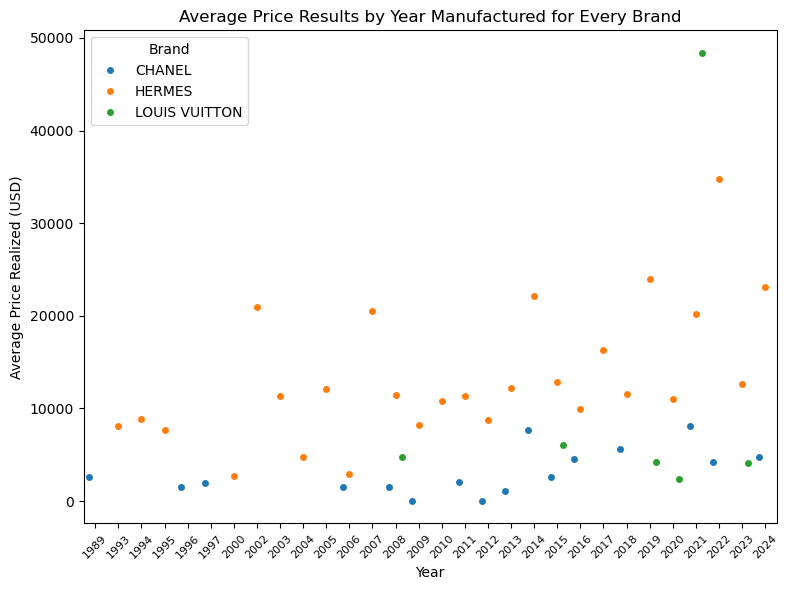

In [ ]:
### Plotting from the average price realized of brands based on year 

# # Plotting graph

# Plotting the dot chart
plt.figure(figsize=(8, 6))
sns.stripplot(data=AvePriceYear_df, x='Year', y='Average_Price_USD', hue='Brand', dodge=True)
plt.xticks(rotation=45, fontsize=8)
plt.title("Average Price Results by Year Manufactured for Every Brand")
plt.ylabel("Average Price Realized (USD)")
plt.tight_layout()
# Display the chart
plt.show()

### Price Realized for Each Brand based on Color

Table 2

In [ ]:
### Analyze price realized for each Brand based on Color and save to datatbase

# Connect to the SQLite database
conn = sqlite3.connect("luxury_handbag_auctions.db")

# Query the required data (Brand, Color, Price Realized)
query = """
    SELECT Brand, Color, `Price Realized (USD)` 
    FROM ChristiesHK_Mar25
"""
PriceByColor = pd.read_sql(query, conn)

# Save the aggregated data back to the database as a new table
PriceByColor.to_sql(
    "PriceByColor", 
    conn, 
    if_exists="replace", 
    index=False
)
# Show Table
PriceByColor

,Brand,Color,Price Realized (USD)
0,HERMES,Green,6100
1,HERMES,Yellow,9700
2,HERMES,Yellow,12100
3,HERMES,Yellow,2300
4,HERMES,Yellow,5600
...,...,...,...
237,LOUIS VUITTON,Multi Color,4800
238,LOUIS VUITTON,Black,3500
239,LOUIS VUITTON,Black,4200
240,LOUIS VUITTON,Black,4800


Visualization 2

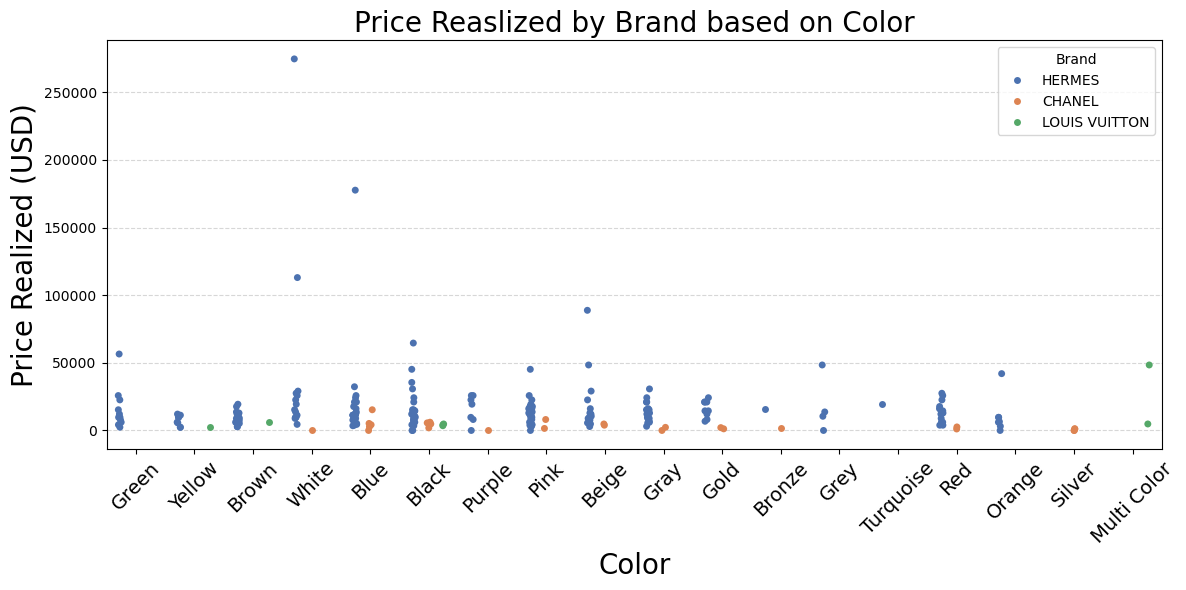

In [ ]:
# Generate the stripplot for price realized for each Brand based on Color
plt.figure(figsize=(12, 6))  # Wider figure for better readability
sns.stripplot(
    data=PriceByColor,
    x='Color',
    y='Price Realized (USD)',
    hue='Brand',
    dodge=True,  # Prevents overlapping points
    palette='deep',  # Better color distinction
    alpha=1  # Slight transparency for overlapping points
)

# Format the plot
# Add title and lables
plt.title("Price Reaslized by Brand based on Color", fontsize=20)
plt.xlabel("Color", fontsize= 20)
plt.ylabel("Price Realized (USD)", fontsize=20)
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add faint gridlines for reference
plt.tight_layout()  # Prevent label cutoff

# Display the chart
plt.show()

### Analize Average Price Realized for Brands By Color

Table 3

In [ ]:
### Analize Average Price Realized for Brands by Color

# Generate Table
# Connect to the SQLite database
conn = sqlite3.connect("luxury_handbag_auctions.db")

# Calculate average prices by querying the database and save table to database
query = """
SELECT 
    Brand, 
    Color, 
    AVG(`Price Realized (USD)`) as `Average_Price_USD`
FROM 
    ChristiesHK_Mar25
GROUP BY 
    Brand, Color
"""
AveragePriceColor_df = pd.read_sql(query, conn)

# Save the Average Price Realized for Brands By Color data back to the database as a new table
AveragePriceColor_df.to_sql(
    "Brand_Color_Average_Prices", 
    conn, 
    if_exists="replace", 
    index=False
)
AveragePriceColor_df.head(10)

,Brand,Color,Average_Price_USD
0,CHANEL,Beige,4350.0
1,CHANEL,Black,4640.0
2,CHANEL,Blue,5480.0
3,CHANEL,Bronze,1800.0
4,CHANEL,Gold,1650.0
5,CHANEL,Gray,1150.0
6,CHANEL,Pink,4800.0
7,CHANEL,Purple,0.0
8,CHANEL,Red,1850.0
9,CHANEL,Silver,600.0


Visualization 3

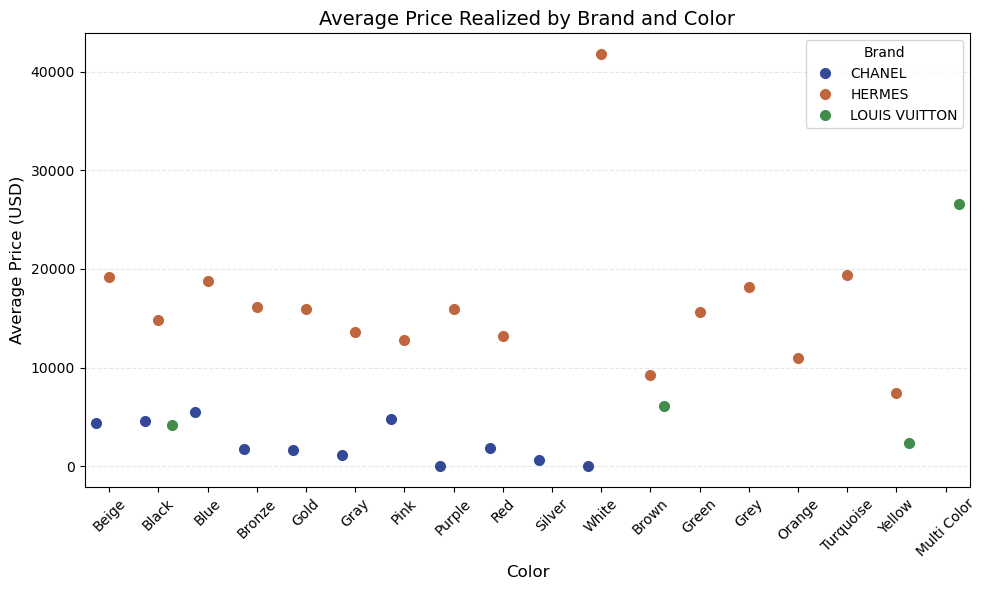

In [ ]:
# Generate the visualization for Average Price Realized for Brands By Color
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=AveragePriceColor_df,
    x='Color',
    y='Average_Price_USD',
    hue='Brand',
    dodge=True,
    palette='dark',
    size=8,
    alpha=0.8
)

# Formatting the table
plt.title("Average Price Realized by Brand and Color", fontsize=14) # Adding title
plt.xlabel("Color", fontsize=12) # Adding lable
plt.ylabel("Average Price (USD)", fontsize=12) # adding label
plt.xticks(rotation=45, fontsize=10) # adjusting ticks
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3) # adding and formatting grid
plt.tight_layout()

# Display the chart
plt.show()

# Close the database connection
conn.close()

### Auction Performance

Table 5

,Price Category,Number of Bags
0,Above Estimate,106
1,Below Estimate,21
2,No Sale,12
3,Within Estimate,103


/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_82090/3309683429.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




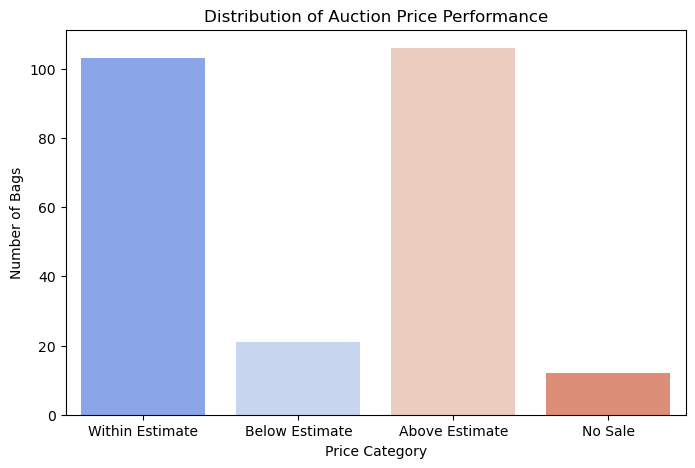

In [ ]:
# Create a table 
# Connect to SQLite database
conn = sqlite3.connect("luxury_handbag_auctions.db")

# Query to get top 10 sales by price
query = """
    SELECT 
        Brand, 
        Description, 
        `Price Realized (USD)`
    FROM Christies_HongKong_March25_Sale
    ORDER BY `Price Realized (USD)` DESC
    LIMIT 10
"""

top_10_sales = pd.read_sql(query, conn)

# Create 'Bag Label' column
top_10_sales['Bag Label'] = top_10_sales['Brand'] + " — " + top_10_sales['Description']

# Save the top 10 results to a new table in the database
top_10_sales.to_sql(
    name="Top_10_Most_Expensive_Bags",  # New table name
    con=conn,
    if_exists="replace",  # Overwrites if table exists
    index=False           # Skip saving pandas index
)

# Commit changes
conn.commit()
# Display table 
top_10_sales

,Brand,Description,Price Realized (USD),Bag Label
0,HERMES,"RARE, MATTE CONCRETE ALLIGATOR, WHITE TOGO, SW...",274600,"HERMES — RARE, MATTE CONCRETE ALLIGATOR, WHITE..."
1,HERMES,"RARE, MATTE NAVY BLUE ALLIGATOR, DEEP BLUE MAD...",177600,"HERMES — RARE, MATTE NAVY BLUE ALLIGATOR, DEEP..."
2,HERMES,"RARE, MATTE WHITE HIMALAYA NILOTICUS CROCODILE...",113000,"HERMES — RARE, MATTE WHITE HIMALAYA NILOTICUS ..."
3,HERMES,"LIMITED EDITION IVORY, SYLVESTER MAUVE & LIME ...",88800,"HERMES — LIMITED EDITION IVORY, SYLVESTER MAUV..."
4,HERMES,"LIMITED EDITION MISTY GRAY, BLACK, FIZZ GREEN ...",64600,"HERMES — LIMITED EDITION MISTY GRAY, BLACK, FI..."
5,HERMES,SHINY ROUSSEAU GREEN ALLIGATOR MINI KELLY 20 II,56500,HERMES — SHINY ROUSSEAU GREEN ALLIGATOR MINI K...
6,HERMES,LIMITED EDITION NATURAL BARENIA LEATHER & OSIE...,48400,HERMES — LIMITED EDITION NATURAL BARENIA LEATH...
7,HERMES,CUSTOM MATTE PEARL GRAY & OREGANO ALLIGATOR MI...,48400,HERMES — CUSTOM MATTE PEARL GRAY & OREGANO ALL...
8,LOUIS VUITTON,LIMITED EDITION PAINTED MONOGRAM COURRIER LOZI...,48400,LOUIS VUITTON — LIMITED EDITION PAINTED MONOGR...
9,HERMES,SHINY PURPLE PINK NILOTICUS CROCODILE BIRKIN 25,45200,HERMES — SHINY PURPLE PINK NILOTICUS CROCODILE...


In [ ]:
Visualization 6

SyntaxError: invalid syntax (844391058.py, line 1)

In [ ]:
# Display the top 10 sales with brand and description
top_10_sales = df.sort_values(by='Price Realized (USD)', ascending=False).head(10)

# Display the top 10 sales with brand and description
top_10_sales[['Brand', 'Description', 'Price Realized (USD)']]
# Create a new label column
top_10_sales['Bag Label'] = top_10_sales['Brand'] + " — " + top_10_sales['Description']
top_10_sales

,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Lower Estimate (USD),Higher Estimate (USD),Price Realized (USD),Price Category,Variance from Higher Estimate,Bag Label
139,142,"RARE, MATTE CONCRETE ALLIGATOR, WHITE TOGO, SW...",HERMES,"Birkin 20, Rare",2022,White,Alligator & Togo,Palladium,153600−281600,153600,281600,274600,Within Estimate,-7000,"HERMES — RARE, MATTE CONCRETE ALLIGATOR, WHITE..."
31,33,"RARE, MATTE NAVY BLUE ALLIGATOR, DEEP BLUE MAD...",HERMES,"Birkin 20, Rare",2019,Blue,Alligator & Epsom,Palladium,102600−205100,102600,205100,177600,Within Estimate,-27500,"HERMES — RARE, MATTE NAVY BLUE ALLIGATOR, DEEP..."
140,143,"RARE, MATTE WHITE HIMALAYA NILOTICUS CROCODILE...",HERMES,"Birkin 25, Rare",2014,White,Crocodile,Palladium,128000−230400,128000,230400,113000,Below Estimate,-117400,"HERMES — RARE, MATTE WHITE HIMALAYA NILOTICUS ..."
125,127,"LIMITED EDITION IVORY, SYLVESTER MAUVE & LIME ...",HERMES,"Kellydole Picto, Limited Edition",2023,Beige,Epsom,Palladium,38400−51200,38400,51200,88800,Above Estimate,37600,"HERMES — LIMITED EDITION IVORY, SYLVESTER MAUV..."
162,165,"LIMITED EDITION MISTY GRAY, BLACK, FIZZ GREEN ...",HERMES,"Kellydole Picto, Limited Edition",2024,Black,Epsom,Palladium,38400−51200,38400,51200,64600,Above Estimate,13400,"HERMES — LIMITED EDITION MISTY GRAY, BLACK, FI..."
171,174,SHINY ROUSSEAU GREEN ALLIGATOR MINI KELLY 20 II,HERMES,Mini Kelly 20 II,2021,Green,Alligator,Gold,38400−51200,38400,51200,56500,Above Estimate,5300,HERMES — SHINY ROUSSEAU GREEN ALLIGATOR MINI K...
148,151,CUSTOM MATTE PEARL GRAY & OREGANO ALLIGATOR MI...,HERMES,"Mini Kelly 20 II, Custom",2021,Grey,Alligator,Gold,38400−51200,38400,51200,48400,Within Estimate,-2800,HERMES — CUSTOM MATTE PEARL GRAY & OREGANO ALL...
63,65,LIMITED EDITION NATURAL BARENIA LEATHER & OSIE...,HERMES,"Mini Kelly, Limited Edition",2021,Beige,Barénia & Osier,Palladium,44800−57600,44800,57600,48400,Within Estimate,-9200,HERMES — LIMITED EDITION NATURAL BARENIA LEATH...
242,259,LIMITED EDITION PAINTED MONOGRAM COURRIER LOZI...,LOUIS VUITTON,"Courrier Lozine Trunk 110, Limited Edition",2021,Multi Color,Canvas,Black,38400−51200,38400,51200,48400,Within Estimate,-2800,LOUIS VUITTON — LIMITED EDITION PAINTED MONOGR...
106,108,LIMITED EDITION SHINY BLACK POROSUS CROCODILE ...,HERMES,"Kelly Élan Folie, Limited Edition",2024,Black,Crocodile,Gold,25600−35900,25600,35900,45200,Above Estimate,9300,HERMES — LIMITED EDITION SHINY BLACK POROSUS C...


/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_82090/3269523169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


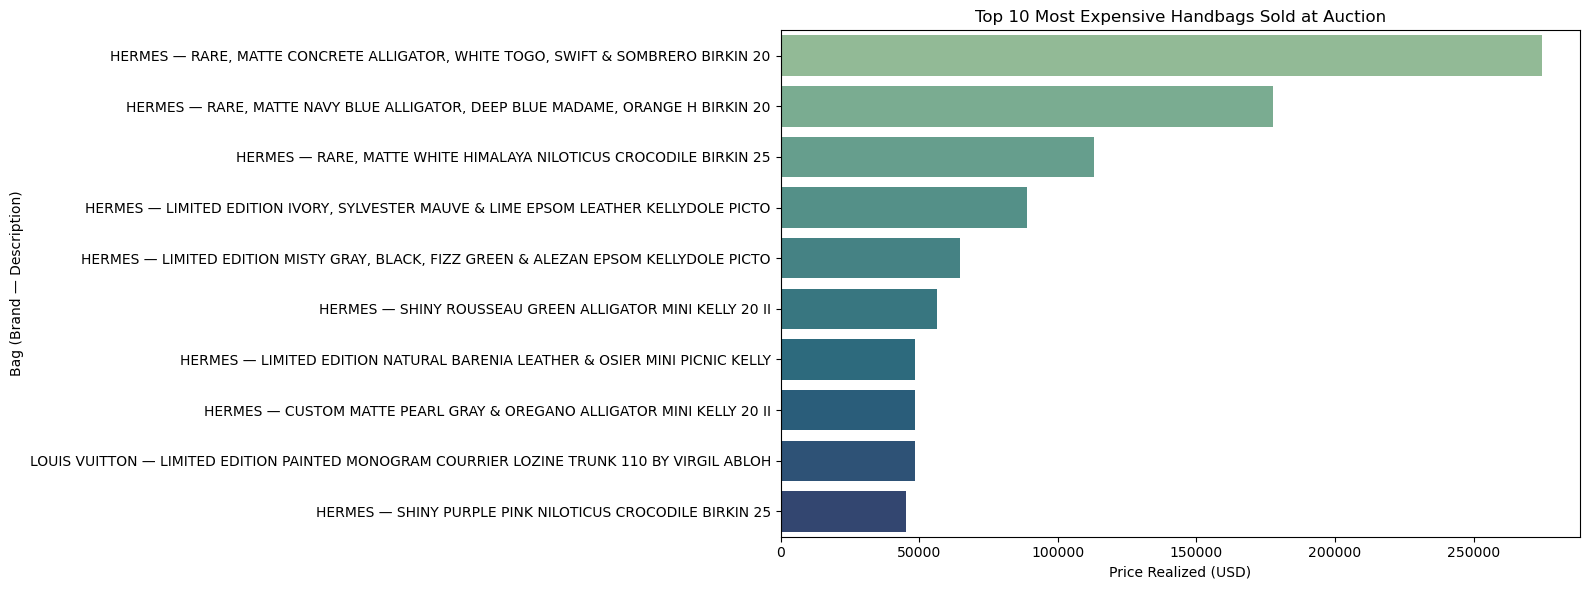

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(
    data=top_10_sales,
    y='Bag Label',
    x='Price Realized (USD)',
    palette='crest'
)

plt.title("Top 10 Most Expensive Handbags Sold at Auction")
plt.xlabel("Price Realized (USD)")
plt.ylabel("Bag (Brand — Description)")
plt.tight_layout()
plt.show()

In [ ]:
#create a table displaying the works passed
works_passed = df.sort_values(by='Price Realized (USD)', ascending=True).head(12)

# Create a label combining Brand and Description
works_passed['Bag Label'] = works_passed['Brand'] + " — " + works_passed['Type']

# Preview the result
works_passed[['Brand','Type','Color', 'Estimate (USD)',]]


,Brand,Type,Color,Estimate (USD)
216,CHANEL,Wallet on Chain,Blue,2000−3100
215,CHANEL,Medium Boy Bag,Purple,2600−3800
180,HERMES,"Harlequin Birkin 35, Limited Edition",Purple,7700−12800
224,CHANEL,Half Moon Clutch,Silver,1500−2300
202,HERMES,Bolide 27,Orange,5100−7700
222,CHANEL,Wallet on Chain,White,2000−3100
212,CHANEL,Camellia Pochette,Silver,2000−3100
223,CHANEL,Wallet on Chain,Gray,2000−3100
105,HERMES,"Mini Kelly 20 II, Limited Edition",Black,38400−51200
99,HERMES,"Clutch, Limited Edition",Black,5100−7700


In [ ]:
#create a visualization for the above , order by estimate 
#create a visualization for the lowest 10 price realized without the 0 

/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_66125/1762890199.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




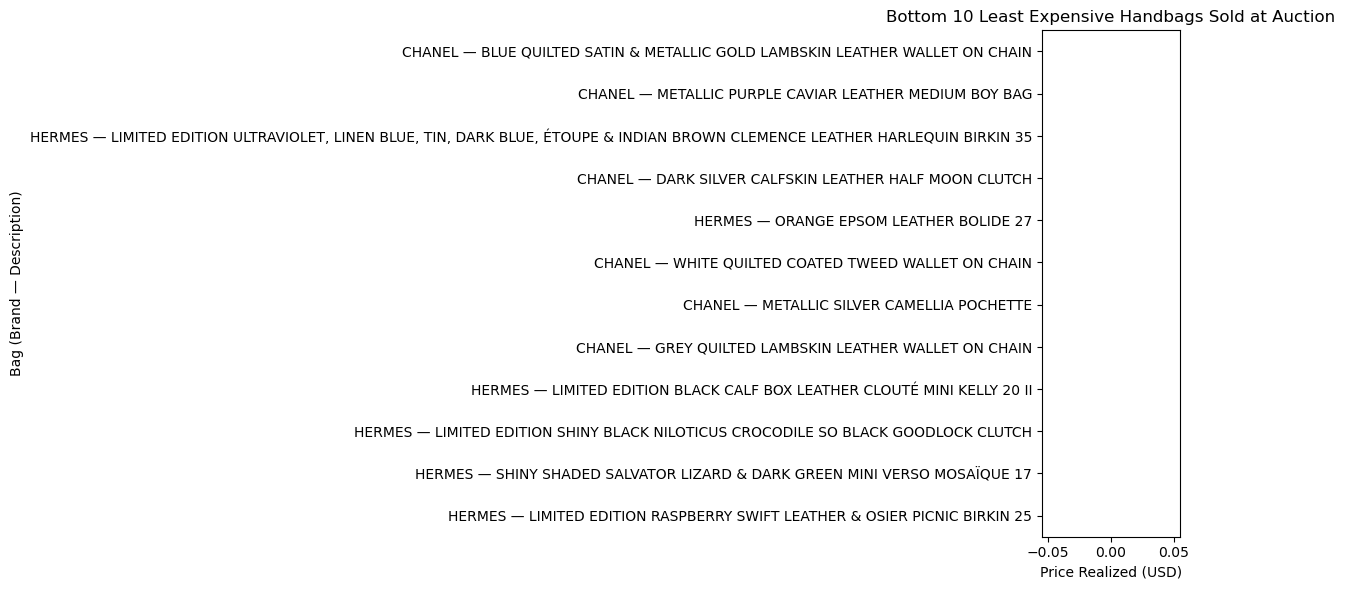

In [ ]:

plt.figure(figsize=(12,6))

# Plot a bar chart for bottom 10 bags
sns.barplot(
    data=bottom_10_sales,
    y='Bag Label',
    x='Price Realized (USD)',
    palette='Reds'
)

plt.title("Bottom 10 Least Expensive Handbags Sold at Auction")
plt.xlabel("Price Realized (USD)")
plt.ylabel("Bag (Brand — Description)")
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Calculate average price realized per color, round to 2 decimals, and sort descending
brand_avg = (df.groupby("Color")["Price Realized (USD)"]
              .mean()
              .round(2)  # Round to 2 decimal places
              .reset_index()
              .sort_values("Price Realized (USD)", ascending=False))

# Create an interactive bar chart with uniform color
fig = px.bar(
    brand_avg, 
    x="Color", 
    y="Price Realized (USD)", 
    text="Price Realized (USD)",  # This will now show the rounded values
    title="Average Auction Price by Color (Highest to Lowest)",
    labels={"Price Realized (USD)": "Avg Price (USD)"},
    color_discrete_sequence=['#1f77b5']  # Single color for all bars
)

# Customize layout
fig.update_traces(
    texttemplate='%{text:,.2f}',  # Format with commas and 2 decimals
    textposition='outside',
    marker_color='#1f78b4'  # Ensures color consistency
)
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title="Avg Price (USD)",
    xaxis_title="Color",
    showlegend=False  # Hides legend since all bars are same color
)

# Show the interactive chart
fig.show()

In [ ]:
import plotly.express as px

# Calculate average price realized per color, round to 2 decimals, and sort descending
brand_avg = (df.groupby("Leather")["Price Realized (USD)"]
              .mean()
              .round(2)  # Round to 2 decimal places
              .reset_index()
              .sort_values("Price Realized (USD)", ascending=False))

# Create an interactive bar chart with uniform color
fig = px.bar(
    brand_avg, 
    x="Leather", 
    y="Price Realized (USD)", 
    text="Price Realized (USD)",  # This will now show the rounded values
    title="Average Auction Price by Leather",
    labels={"Price Realized (USD)": "Avg Price (USD)"},
    color_discrete_sequence=['#1f77b4']  # Single color for all bars
)

# Customize layout
fig.update_traces(
    texttemplate='%{text:,.2f}',  # Format with commas and 2 decimals
    textposition='outside',
    marker_color='#1f77b4'  # Ensures color consistency
)
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title="Avg Price (USD)",
    xaxis_title="Color",
    showlegend=False  # Hides legend since all bars are same color
)

# Show the interactive chart
fig.show()

In [ ]:
# Close the connection to the database
conn.close()

In [ ]:
from flask import Flask, render_template, jsonify
import pandas as pd

app = Flask(__name__)



# Database connection
def connect_db():
    conn = sqlite3.connect('luxury_bags.db')
    conn.row_factory = sqlite3.Row
    return conn

@app.route("/")
def index():
    """Render the main HTML page"""
    return render_template("index.html")

@app.route("/data")
def get_data():
    """Provide auction data as JSON for frontend"""
    data = df.to_dict(orient="records")  # Convert DataFrame to list of dicts
    return jsonify(data)

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

SystemExit: 1

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [ ]:
PASTE THIS INTO HTML 


Starting Flask on port 5001...
 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

SystemExit: 1

In [ ]:
# #Altair for visualizations 
# pip install altair
# import altair as alt

# alt.Chart(df).mark_line().encode(
#     x='Collection/Year:O',
#     y='Price Realised (USD):Q',
#     color='Brand:N'
# ).interactive()


In [ ]:
# pip install folium
# import folium

# m = folium.Map(location=[22.3, 114.2], zoom_start=5)  # Hong Kong

# folium.Marker([22.3, 114.2], popup="Christie's HK - Total Sales: $200,000").add_to(m)

# m


In [ ]:
# pip install streamlit
# # Save this in streamlit_app.py
# import streamlit as st
# import pandas as pd

# df = pd.read_csv("cleaned_luxury_bag_data.csv")

# brand = st.selectbox("Choose Brand", df['Brand'].unique())
# filtered = df[df['Brand'] == brand]

# st.line_chart(filtered.groupby("Collection/Year")["Price Realised (USD)"].mean())
# streamlit run streamlit_app.py
